In [1]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt

# to save the model
import joblib

# to build the model
from sklearn.linear_model import Lasso

# to evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [2]:
# load the train and test set with the engineered variables

# we built and saved these datasets in a previous notebook.
# If you haven't done so, go ahead and check the previous notebooks (step 2)
# to find out how to create these datasets

X_train = pd.read_csv('xtrain.csv')
X_test = pd.read_csv('xtest.csv')

X_train.head()

,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,0.123735,0.439752,0.690362,0.564855,0.743494,0.137613,0.909091,0.633333,0.782609,0.135593,0.166667,0.909091,0.633333,0.782609,0.440678,0.166667,0.470280,0.0,0.270270,0.238636,0.000000,0.0,0.257256,0.151316
1,0.270630,0.536782,0.072524,0.390582,0.245192,0.248401,0.181818,0.500000,0.043478,0.322034,0.666667,0.181818,0.500000,0.086957,0.186441,0.666667,0.437063,0.0,0.283784,0.829545,0.000000,0.0,0.282322,0.046053
2,0.041725,0.513858,0.536762,0.509323,0.570664,0.040074,0.727273,0.933333,0.565217,0.830508,0.833333,0.727273,0.933333,0.608696,0.016949,0.833333,0.746503,0.0,0.189189,0.340909,0.781250,0.0,0.693931,0.046053
3,0.072366,0.544863,0.312979,0.476247,0.328050,0.069557,0.818182,0.400000,1.000000,0.372881,0.833333,0.818182,0.400000,1.000000,0.559322,0.833333,0.503497,0.0,0.040541,0.590909,0.000000,0.0,0.283641,0.059211
4,0.042026,0.138733,0.353218,0.163031,0.349159,0.024294,0.818182,1.000000,0.347826,0.915254,0.333333,0.818182,1.000000,0.391304,0.000000,0.333333,0.375874,0.0,0.243243,0.647727,0.042614,0.0,0.208443,0.049342


In [3]:
# load the target (remember that the target is log transformed)
y_train = pd.read_csv('ytrain.csv')
y_test = pd.read_csv('ytest.csv')

y_train.head()

,Duration
0,2.833213
1,3.931826
2,2.484907
3,2.302585
4,1.609438


In [9]:
features = pd.read_csv('selected_features.csv')

# display final feature set
features

,Distance,PLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dday,Dhour,Dmin,DDweek,Temp,Wind,Humid,Solar


In [23]:
# reduce the train and test set to the selected features

X_train = X_train[[i for i in features]]
X_test = X_test[[i for i in features]]

In [22]:
# reduce the train and test set to the selected features

X_train.shape,X_test.shape

((864101, 16), (96012, 16))

In [24]:
X_train.head()

,Distance,PLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dday,Dhour,Dmin,DDweek,Temp,Wind,Humid,Solar
0,0.123735,0.690362,0.137613,0.909091,0.633333,0.782609,0.135593,0.166667,0.633333,0.782609,0.440678,0.166667,0.470280,0.270270,0.238636,0.000000
1,0.270630,0.072524,0.248401,0.181818,0.500000,0.043478,0.322034,0.666667,0.500000,0.086957,0.186441,0.666667,0.437063,0.283784,0.829545,0.000000
2,0.041725,0.536762,0.040074,0.727273,0.933333,0.565217,0.830508,0.833333,0.933333,0.608696,0.016949,0.833333,0.746503,0.189189,0.340909,0.781250
3,0.072366,0.312979,0.069557,0.818182,0.400000,1.000000,0.372881,0.833333,0.400000,1.000000,0.559322,0.833333,0.503497,0.040541,0.590909,0.000000
4,0.042026,0.353218,0.024294,0.818182,1.000000,0.347826,0.915254,0.333333,1.000000,0.391304,0.000000,0.333333,0.375874,0.243243,0.647727,0.042614


In [25]:
# set up the model
# remember to set the random_state / seed

lin_model = Lasso(alpha=0.001, random_state=42)

# train the model

lin_model.fit(X_train, y_train)

Lasso(alpha=0.001, random_state=42)

In [27]:
# evaluate the model:
# ====================

# remember that we log transformed the output (Duration)
# in our feature engineering notebook (step 2).

# In order to get the true performance of the Lasso
# we need to transform both the target and the predictions
# back to the original Duration values.

# We will evaluate performance using the mean squared error and
# the root of the mean squared error and r2

# make predictions for train set
pred = lin_model.predict(X_train)

# determine mse, rmse and r2
print('train mse: {}'.format(int(
    mean_squared_error(np.exp(y_train), np.exp(pred)))))
print('train rmse: {}'.format(int(
    mean_squared_error(np.exp(y_train), np.exp(pred), squared=False))))
print('train r2: {}'.format(
    r2_score(np.exp(y_train), np.exp(pred))))
print()

# make predictions for test set
pred = lin_model.predict(X_test)

# determine mse, rmse and r2
print('test mse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred)))))
print('test rmse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred), squared=False))))
print('test r2: {}'.format(
    r2_score(np.exp(y_test), np.exp(pred))))
print()

print('Average Duration: ', int(np.exp(y_train).median()))

train mse: 4294
train rmse: 65
train r2: -5.842912883497875

test mse: 3860
test rmse: 62
test r2: -5.1538466947488

Average Duration:  15


Text(0.5, 1.0, 'Evaluation of Lasso Predictions')

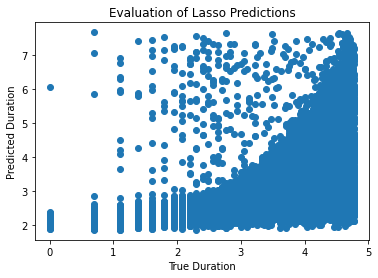

In [28]:
# let's evaluate our predictions respect to the real sale price
plt.scatter(y_test, lin_model.predict(X_test))
plt.xlabel('True Duration')
plt.ylabel('Predicted Duration')
plt.title('Evaluation of Lasso Predictions')

In [30]:
y_test.reset_index(drop=True)

,Duration
0,2.397895
1,3.044522
2,4.043051
3,2.639057
4,3.850148
...,...
96007,3.828641
96008,2.708050
96009,1.791759
96010,0.693147


In [31]:
y_test.reset_index(drop=True, inplace=True)

preds = pd.Series(lin_model.predict(X_test))

preds

0        2.475802
1        2.942049
2        4.625551
3        2.635325
4        2.641199
           ...   
96007    2.822321
96008    2.804273
96009    2.370742
96010    2.162318
96011    2.605323
Length: 96012, dtype: float64

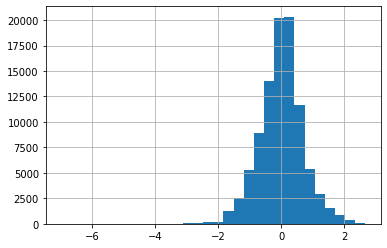

In [32]:
# let's evaluate the distribution of the errors: 
# they should be fairly normally distributed

errors = y_test['Duration'] - preds
errors.hist(bins=30)
plt.show()

In [196]:
importance.T.shape

(16,)

In [239]:
importance = pd.Series(np.abs(lin_model.coef_.ravel()))


In [240]:
importance.set_axis([i for i in features],axis=0,inplace=True)
importance.head()

Distance     5.410861
PLatd        0.033097
Haversine    0.416199
Pmonth       0.069298
Pday         0.001289
dtype: float64

Text(0.5, 1.0, 'Feature Importance')

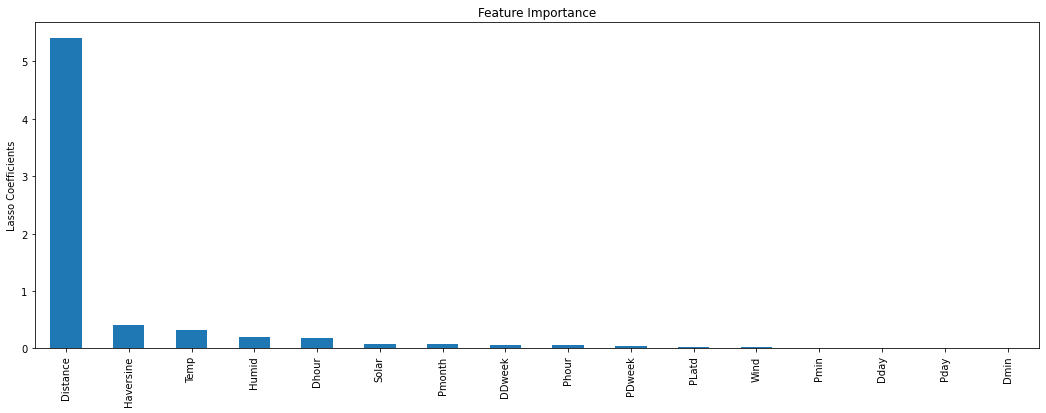

In [241]:
# Finally, just for fun, let's look at the feature importance

#importance.index = features
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))
plt.ylabel('Lasso Coefficients')
plt.title('Feature Importance')


# Ensemble Models

## Random Forest

In [246]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


In [ ]:
rf=RandomForestRegressor()
params={'max_depth': [1, 5, 10, 50], 'min_samples_split':[5, 10, 100, 500]}

cross_val=GridSearchCV(estimator=rf, param_grid=params, cv=3,verbose=2,n_jobs=-1)

cross_val.fit(X_train,y_train)

print('='*100)
print('The Best Parameters are : ',cross_val.best_params_)
print('='*100)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [ ]:
rf_best = cross_val.best_estimator_
rf_best.fit(X_train, y_train)

y_train_pred = rf_best.predict(X_train)
y_cv_pred = rf_best.predict(X_cv)
y_test_pred = rf_best.predict(X_test)

print("*"*50)
print("Train Root Mean squared error: %.2f" % sqrt(mean_squared_error(y_train, y_train_pred)))
print("CV Root Mean squared error: %.2f" % sqrt(mean_squared_error(y_cv, y_cv_pred)))
print("Test Root Mean squared error: %.2f" % sqrt(mean_squared_error(y_test, y_test_pred)))
print("*"*50)
print("Train Mean Absolute error: ",mean_absolute_error(y_train,y_train_pred))
print("CV Mean Absolute error: ",mean_absolute_error(y_cv,y_cv_pred))
print("Test Mean Absolute error: ",mean_absolute_error(y_test,y_test_pred))
print("*"*50) 
print("Train Median Absolute error: ",median_absolute_error(y_train,y_train_pred))
print("CV Median Absolute error: ",median_absolute_error(y_cv,y_cv_pred))
print("Test Median Absolute error: ",median_absolute_error(y_test,y_test_pred))
print("*"*50)
print("Train r2_score error: ",r2_score(y_train,y_train_pred))
print("CV r2_score error: ",r2_score(y_cv,y_cv_pred))
print("Test r2_score error: ",r2_score(y_test,y_test_pred))
print("*"*50)

d = pd.DataFrame({'Actual_Duration': y_test, 'Predicted_Duration': y_test_pred})
d.head(5)


In [ ]:
plt.figure(figsize=(10,9))
feature_imp = pd.Series(rf_best.feature_importances_, index=X.columns).sort_values(ascending=False)

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features", size=20)
plt.legend()
plt.show()


In [242]:
# we are happy to our model, so we save it to be able
# to score new data

joblib.dump(lin_model, 'linear_regression.joblib') 

['linear_regression.joblib']